## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import PowerTransformer

/mnt/disks/user/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [52]:
credit_card_fraud_base_data = pd.read_csv('credit_card_data/creditcard.csv')

## Exploratory data analysis

In [4]:
credit_card_fraud_base_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#observe the different feature type present in the data
credit_card_fraud_base_data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Here we will observe the distribution of our classes

In [6]:
classes=credit_card_fraud_base_data['Class'].value_counts()
normal_share=classes[0]/credit_card_fraud_base_data['Class'].count()*100
fraud_share=classes[1]/credit_card_fraud_base_data['Class'].count()*100

In [7]:
print(classes)
print(normal_share)
classes.dtypes

0    284315
1       492
Name: Class, dtype: int64
99.82725143693798


dtype('int64')

In [8]:
pivt = credit_card_fraud_base_data.pivot_table(index='Class',values='Time' , aggfunc='count')
repaired_df = pd.DataFrame(pivt.to_records())

repaired_df["class_name"] = "normal_transaction"
repaired_df["class_name"].loc[repaired_df["Class"] == 1] = "fraud_transaction"
repaired_df = repaired_df.rename(columns={'Time': 'Number_of_transactions'})
repaired_df["class_prcnt"] = 0
repaired_df["class_prcnt"] = round((repaired_df["Number_of_transactions"]/284807),3)*100
repaired_df.head()

,Class,Number_of_transactions,class_name,class_prcnt
0,0,284315,normal_transaction,99.8
1,1,492,fraud_transaction,0.2


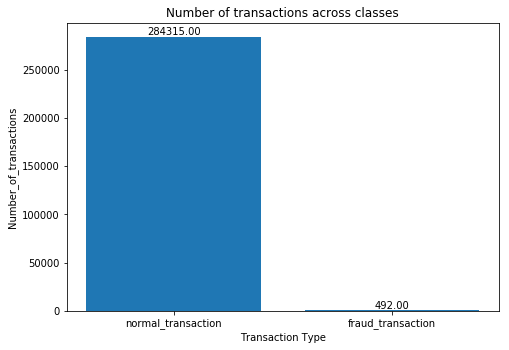

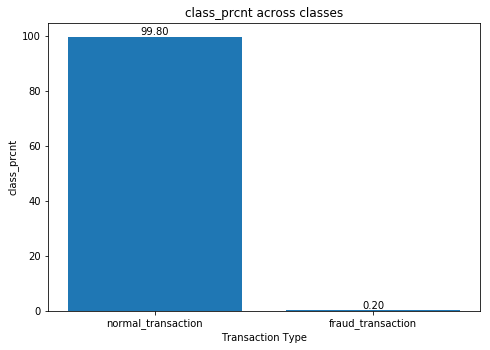

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(repaired_df['class_name'],repaired_df['Number_of_transactions'])
ax.set_ylabel('Number_of_transactions')
ax.set_xlabel('Transaction Type')
ax.set_title('Number of transactions across classes')


for x,y in zip(repaired_df['class_name'],repaired_df['Number_of_transactions']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(repaired_df['class_name'],repaired_df['class_prcnt'])
ax.set_ylabel('class_prcnt')
ax.set_xlabel('Transaction Type')
ax.set_title('class_prcnt across classes')


for x,y in zip(repaired_df['class_name'],repaired_df['class_prcnt']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()


In [10]:
scatter_data = credit_card_fraud_base_data.copy()
scatter_data["color"] = "black"
scatter_data["color"].loc[scatter_data["Class"]==0] = "green"
scatter_data["color"].loc[scatter_data["Class"]==1] = "red"

# fig, ax = plt.subplots()
# ax.scatter(scatter_data['Time'], scatter_data['Class'], c = scatter_data["color"])
# # plt.title("Income per Capita vs Child Mortality per 1000 across clusters")
# # plt.xlabel("Income per Capita")
# # plt.ylabel("Child Mortality per 1000")
# plt.show()

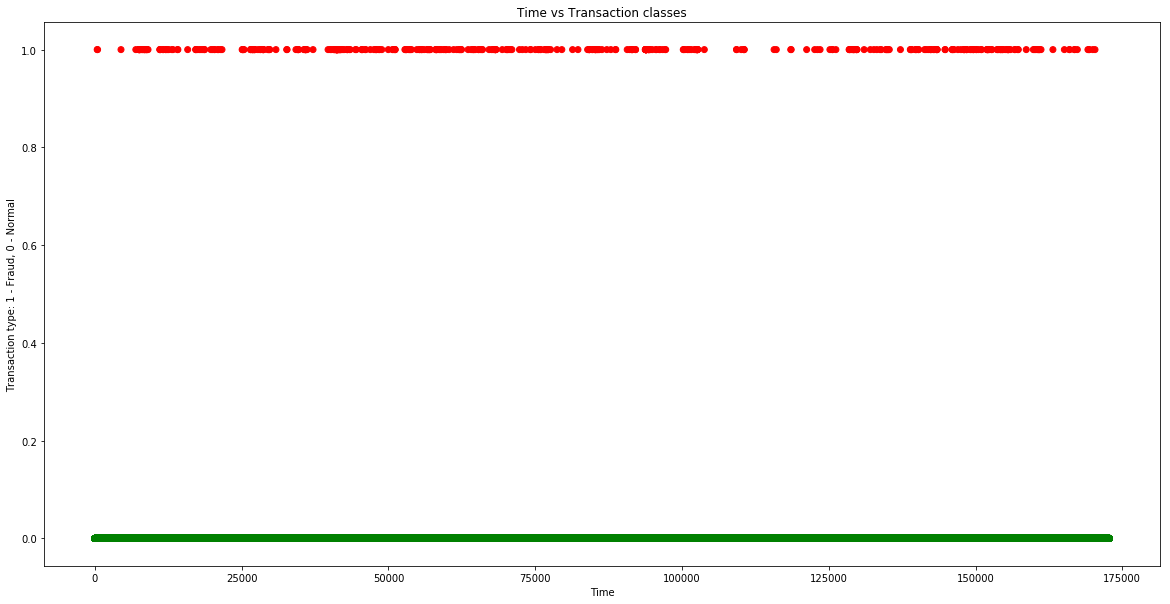

In [11]:
# Create a scatter plot to observe the distribution of classes with time
x = list(scatter_data['Time'])
y = list(scatter_data['Class'])

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x, y, c = scatter_data["color"])

plt.title("Time vs Transaction classes")
plt.xlabel("Time")
plt.ylabel("Transaction type: 1 - Fraud, 0 - Normal")
plt.show()

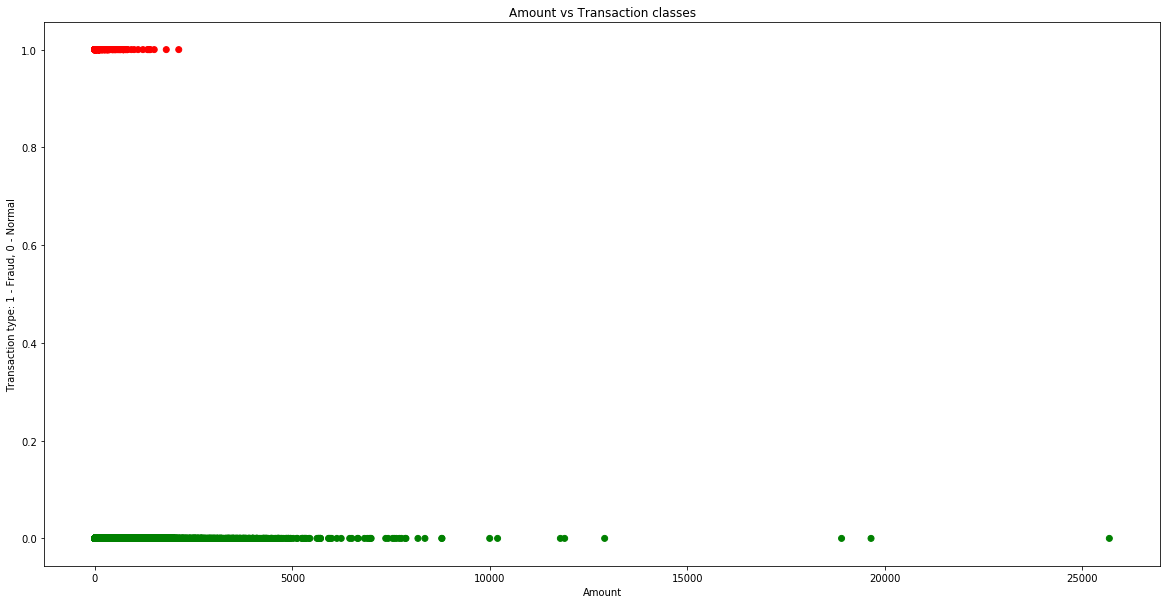

In [12]:
# Create a scatter plot to observe the distribution of classes with Amount
x = list(scatter_data['Amount'])
y = list(scatter_data['Class'])

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x, y, c = scatter_data["color"])

plt.title("Amount vs Transaction classes")
plt.xlabel("Amount")
plt.ylabel("Transaction type: 1 - Fraud, 0 - Normal")
plt.show()

In [13]:
credit_card_fraud_base_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:
credit_card_fraud_base_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Correlation analysis of features with target variable and with themselves

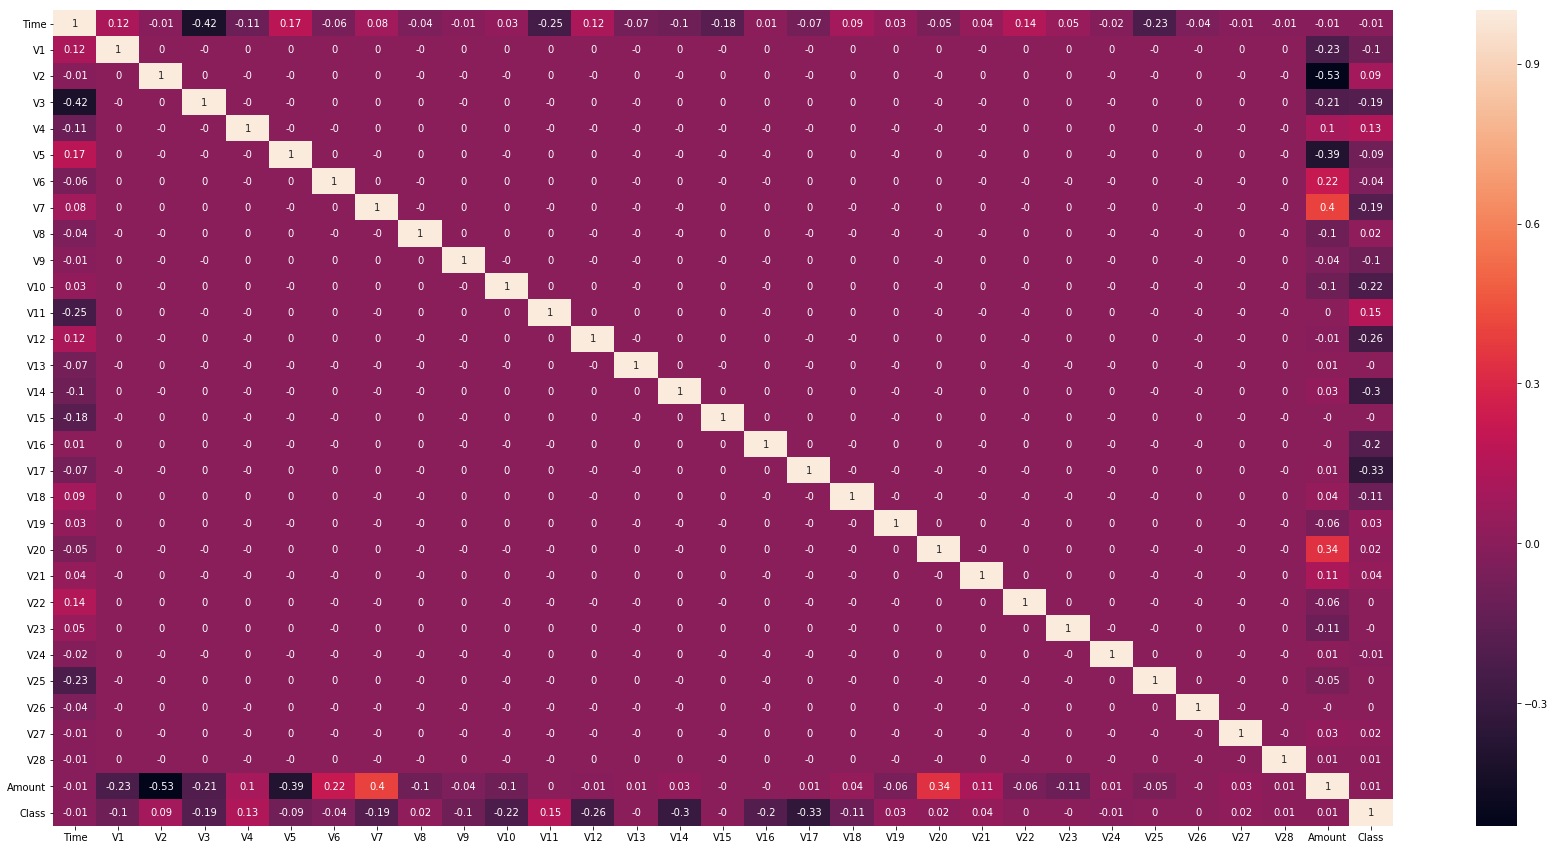

In [15]:
correlation_matrix = credit_card_fraud_base_data.corr().round(2)

#overlaying heatmap on top of correlation matrix
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(30,15))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, ax=ax)

### Undersampling normal transactions to magnify correlation of variables with fraud transactions

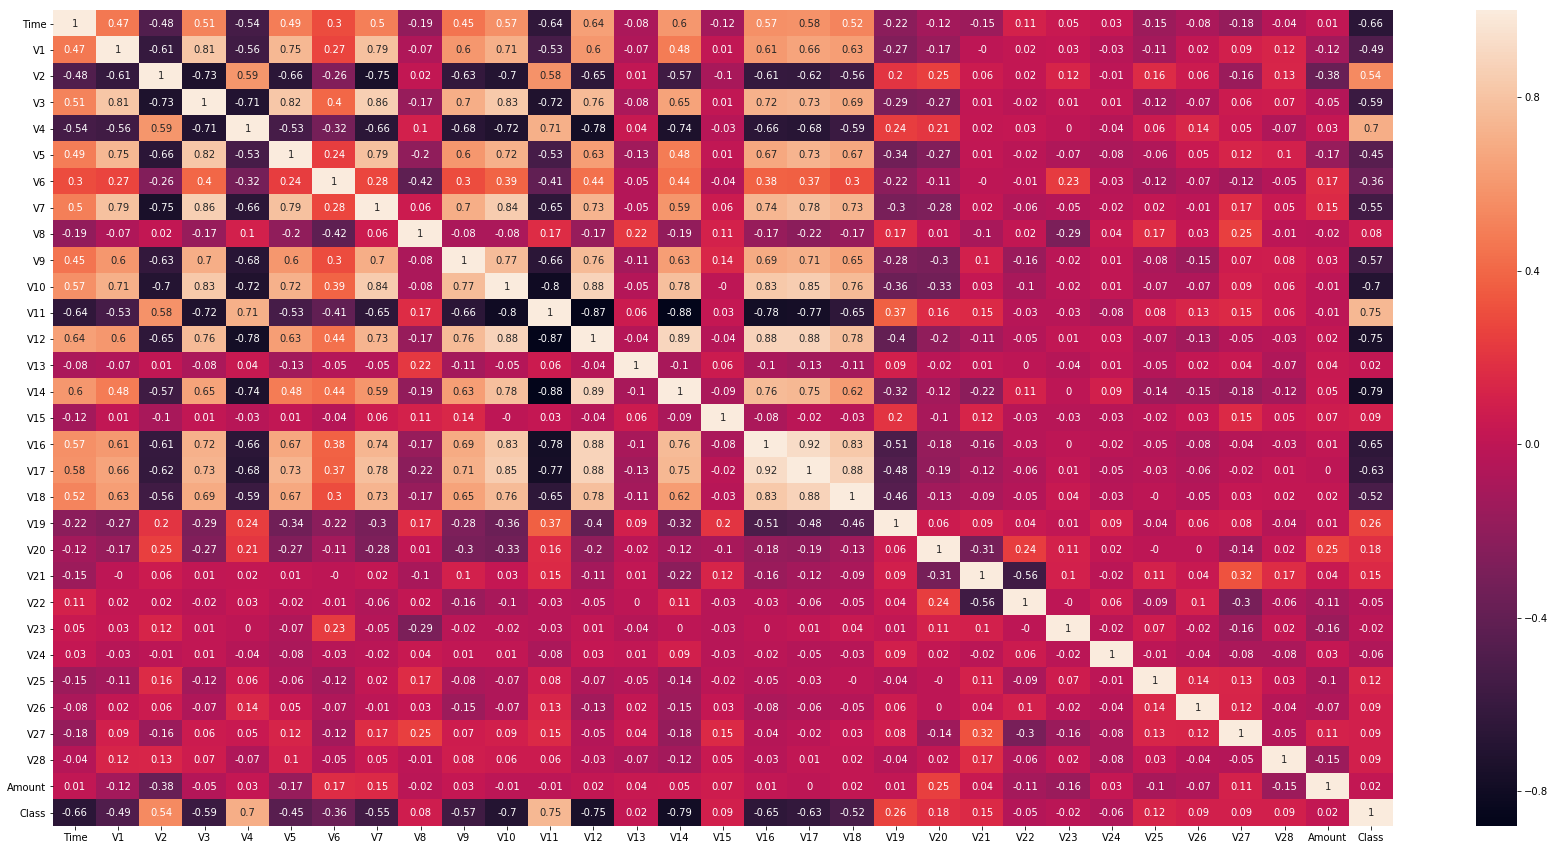

In [47]:
credit_card_fraud_base_data_rfecv = credit_card_fraud_base_data.copy()
credit_card_fraud_base_data_rfecv = credit_card_fraud_base_data.sort_values(by=['Class'], ascending=False)
credit_card_fraud_base_data_rfecv = credit_card_fraud_base_data_rfecv.reset_index()
credit_card_fraud_base_data_rfecv = credit_card_fraud_base_data_rfecv[0:2000]
credit_card_fraud_base_data_rfecv = credit_card_fraud_base_data_rfecv.drop(['index'],axis=1)
from sklearn.utils import shuffle
credit_card_fraud_base_data_rfecv = shuffle(credit_card_fraud_base_data_rfecv)

correlation_matrix = credit_card_fraud_base_data_rfecv.corr().round(2)

#overlaying heatmap on top of correlation matrix
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(30,15))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, ax=ax)

#### Variables like V1,V2,V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18 have strong correlation with fraudulent transactions
#### Dropping time variable.

#### Thus we would need to carefully eliminate uncorrelated and mutually correlated features for improving model performance. This is achieved below through RFECV and selective feature elimination.

#### Dropping variables which are weakly correlated with fraud and normal transactions (both).
#### Dropping time variable as this won't be available during real time.

In [53]:
credit_card_fraud_base_data = credit_card_fraud_base_data.drop(["Time","Amount","V8","V13","V22","V23"],axis=1)

### Test and train split

### Running RFECV to identify optimal number of features

In [54]:
credit_card_fraud_base_data_rfecv = credit_card_fraud_base_data.copy()
credit_card_fraud_base_data_rfecv = credit_card_fraud_base_data.sort_values(by=['Class'], ascending=False)
credit_card_fraud_base_data_rfecv = credit_card_fraud_base_data_rfecv.reset_index()
credit_card_fraud_base_data_rfecv = credit_card_fraud_base_data_rfecv[0:5000]
credit_card_fraud_base_data_rfecv = credit_card_fraud_base_data_rfecv.drop(['index'],axis=1)

credit_card_fraud_base_data_rfecv = shuffle(credit_card_fraud_base_data_rfecv)

credit_card_fraud_base_data_rfecv["Class"].value_counts()

0    4508
1     492
Name: Class, dtype: int64

In [55]:
credit_card_fraud_xbase_rfecv = credit_card_fraud_base_data_rfecv.copy().drop(['Class'],axis=1)
credit_card_fraud_ybase_rfecv = credit_card_fraud_base_data_rfecv.copy()['Class']

x_train_rfecv, x_test_rfecv, y_train_rfecv, y_test_rfecv = train_test_split(credit_card_fraud_xbase_rfecv, credit_card_fraud_ybase_rfecv, test_size=0.20, random_state=42)

In [56]:
credit_card_fraud_base_data_rfecv.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,...,V18,V19,V20,V21,V24,V25,V26,V27,V28,Class
4817,2.088442,-0.089343,-2.257956,0.275920,0.660883,-1.015149,0.627231,0.317282,0.178835,-1.294687,...,-0.517734,0.250398,-0.203436,0.080924,0.531286,0.392477,0.696093,-0.130875,-0.077615,0
1444,1.367420,-0.571033,-0.648368,4.112771,0.021372,0.946734,0.081718,-0.343673,1.298767,-0.279857,...,-0.377736,-0.610959,0.113738,-0.187877,0.685157,-0.287738,-0.337480,-0.073440,-0.007206,0
3058,-0.041382,0.721523,0.491412,-0.148978,0.590066,-0.341391,0.736122,-0.533559,-0.186656,0.425000,...,0.061764,1.504470,-0.044653,-0.147934,-0.404899,-0.831351,0.303329,0.133236,0.169068,0
4398,2.033411,-0.108296,-1.180218,0.214537,0.118856,-0.612560,0.070503,0.280192,0.229674,0.739674,...,-0.374293,0.486502,-0.199008,-0.251454,-0.391422,-0.294731,0.203452,-0.070867,-0.073653,0
3560,1.866402,1.098889,-1.768426,3.975836,1.188992,-0.184531,0.349149,-1.305129,0.469379,1.036995,...,0.942652,-1.376204,-0.195307,-0.390848,-0.788235,-0.254235,-0.331381,-0.006617,0.004080,0


In [ ]:
#### Minimum features to select is kept at 17, given ~15+ features are strongly correlated with frauds.

In [57]:
X = x_train_rfecv.copy()
target = y_train_rfecv.copy()

rfc =  RandomForestClassifier(random_state=101,class_weight="balanced") #choosing class_weight parameter as "balanced" as it is the target variable is highly imbalanced
rfecv2 = RFECV(estimator=rfc, step=2, cv=StratifiedKFold(5), scoring='accuracy',min_features_to_select = 15,n_jobs=-1) #Increasing number of jobs for parallelism and increasing feature seletion speed
rfecv2.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(class_weight='balanced',
                                       random_state=101),
      min_features_to_select=15, n_jobs=-1, scoring='accuracy', step=2)

### Printing optimal number of features.

In [58]:
print('Optimal number of features: {}'.format(rfecv2.n_features_))

Optimal number of features: 16


In [59]:
print("Features being dropped: ", X.columns[np.where(rfecv2.support_ == False)[0]])

Features being dropped:  Index(['V5', 'V6', 'V9', 'V18', 'V24', 'V25', 'V26', 'V27'], dtype='object')


In [60]:
print("Features selected: ", X.columns[np.where(rfecv2.support_ == True)[0]])

Features selected:  Index(['V1', 'V2', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V15', 'V16',
       'V17', 'V19', 'V20', 'V21', 'V28'],
      dtype='object')


### Dropping features from train and test set based on Recursive Feature Elimination with Cross Validation

In [61]:
credit_card_fraud_xbase = credit_card_fraud_base_data.copy().drop(['Class'],axis=1)
credit_card_fraud_ybase = credit_card_fraud_base_data.copy()['Class']

x_train, x_test, y_train, y_test = train_test_split(credit_card_fraud_xbase, credit_card_fraud_ybase, test_size=0.20, random_state=42)

In [62]:
X = x_train

X.drop(X.columns[np.where(rfecv2.support_ == False)[0]], axis=1, inplace=True)
x_test.drop(x_test.columns[np.where(rfecv2.support_ == False)[0]], axis=1, inplace=True)

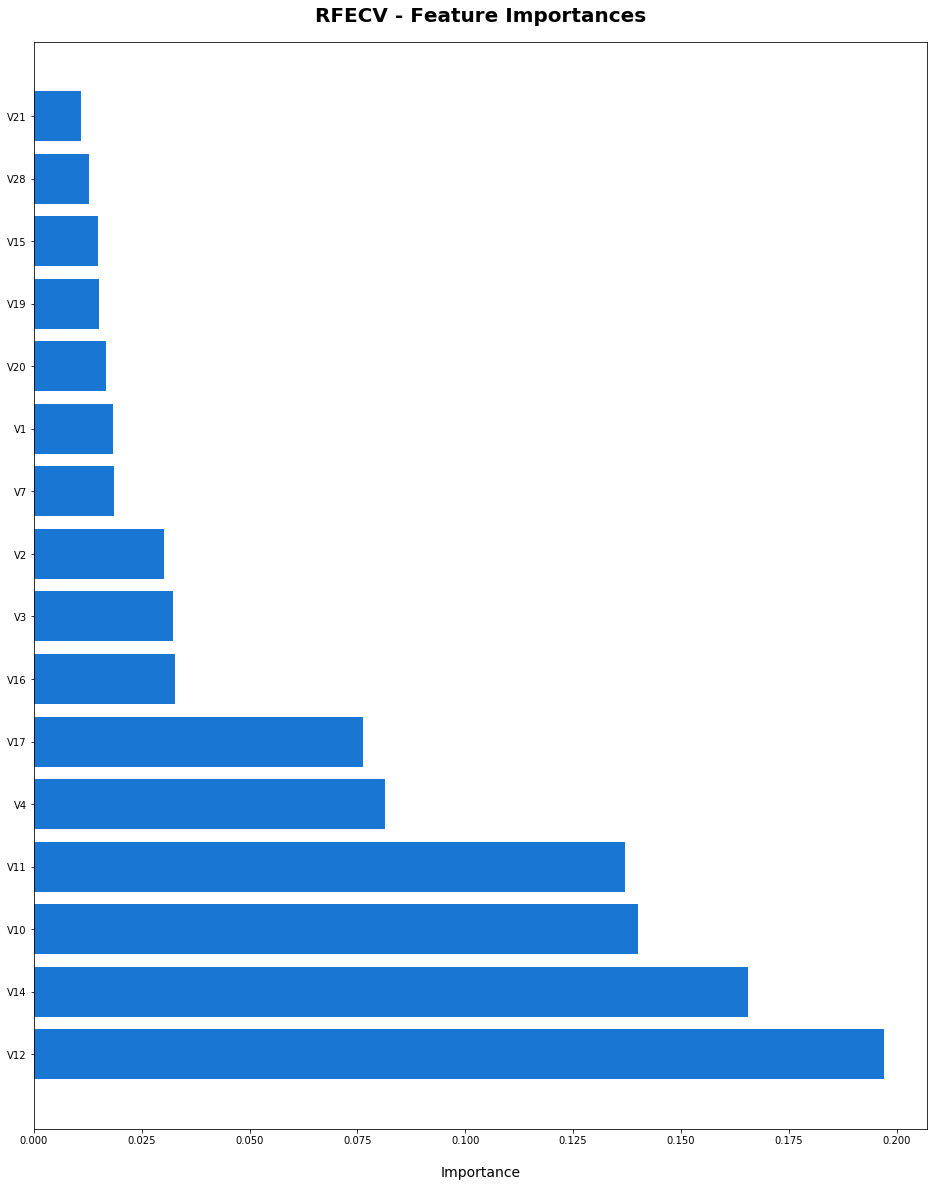

In [63]:
#Plotting feature importance
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv2.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 20))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [64]:
#Shape of training data after RFE: Note that number of columns/features are reduced to
x_train.shape

(227845, 16)

In [65]:
x_train_with_const = sm.add_constant(x_train)

In [66]:
import statsmodels.api as sm

logit_model=sm.Logit(y_train,x_train_with_const)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.004107
         Iterations 13
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.677    
Dependent Variable: Class            AIC:              1905.4778
Date:               2021-04-05 17:16 BIC:              2081.1970
No. Observations:   227845           Log-Likelihood:   -935.74  
Df Model:           16               LL-Null:          -2899.5  
Df Residuals:       227828           LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     13.0000                                     
------------------------------------------------------------------
         Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
const   -8.3169     0.1325   -62.7510   0.0000   -8.5767   -8.0571
V1       0.0772     0.0386     1.9989   0.0456    0.0015    0.1528
V2

### Calculating confusion matrix on same feature set using sklearn's logistic regression model

In [67]:
from sklearn.linear_model import LogisticRegression
sklearn_logit_model = LogisticRegression(random_state=0).fit(x_train, y_train)

In [68]:
from sklearn.metrics import r2_score
y_predict = sklearn_logit_model.predict(x_test)
print(r2_score(y_test, y_predict))

0.5195816297819074


In [69]:
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.60      0.72        98

    accuracy                           1.00     56962
   macro avg       0.94      0.80      0.86     56962
weighted avg       1.00      1.00      1.00     56962

[[56856     8]
 [   39    59]]


In [70]:
vif_estimation_data_frame = add_constant(x_train)
vif = pd.Series([variance_inflation_factor(vif_estimation_data_frame.values, i) 
               for i in range(vif_estimation_data_frame.shape[1])], 
              index=vif_estimation_data_frame.columns)
vif_df = pd.DataFrame(vif)

#renaming dataframe column for better interpretability
vif_df.rename(columns = {0:'vif_value'}, inplace = True) 

#converting indexs (column names) into a dataframe columns
vif_df = vif_df.reset_index()
vif_df.head()
#renaming newly creating index column for better interpretability
vif_df.rename(columns = {'index':'col_names'}, inplace = True) 
vif_df = vif_df.sort_values(by='vif_value',ascending=False)
vif_df.head(10)

,col_names,vif_value
5,V7,1.000692
3,V3,1.000292
2,V2,1.000242
1,V1,1.000231
6,V10,1.000206
15,V21,1.000203
14,V20,1.000126
16,V28,1.000125
4,V4,1.000064
11,V16,1.000063


### No feature with high VIF & p-value. Cut-offs: 0.05 for p-value and 5 for VIF.
### Removing highest p-value feature v15, and checking model performance impact.

In [71]:
X = x_train.copy().drop(['V15'],axis=1)
y = y_train

x_train_with_const = sm.add_constant(X)
est = sm.OLS(y, x_train_with_const)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Class   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                 1.454e+04
Date:                Mon, 05 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:17:44   Log-Likelihood:             4.7796e+05
No. Observations:              227845   AIC:                        -9.559e+05
Df Residuals:                  227829   BIC:                        -9.557e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017   6.22e-05     27.728      0.0

In [72]:
sklearn_logit_model = LogisticRegression(random_state=0).fit(X, y)
x_test = x_test.copy().drop(['V15'],axis=1)
y_predict = sklearn_logit_model.predict(x_test)
print(r2_score(y_test, y_predict))

0.5195816297819074


In [73]:
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.60      0.72        98

    accuracy                           1.00     56962
   macro avg       0.94      0.80      0.86     56962
weighted avg       1.00      1.00      1.00     56962

[[56856     8]
 [   39    59]]


#### Not dropping any features based on p-value and VIF as it is negatively impacting OLS model's r-sq.

#### However, sklearn's logistic regression seems to be immune to further feature elimination, thus instead of dropping features in base dataset we will try ridge and lasso regressions to see if our results improve in model building section.

### Plotting the distribution of a varaible before transforming.

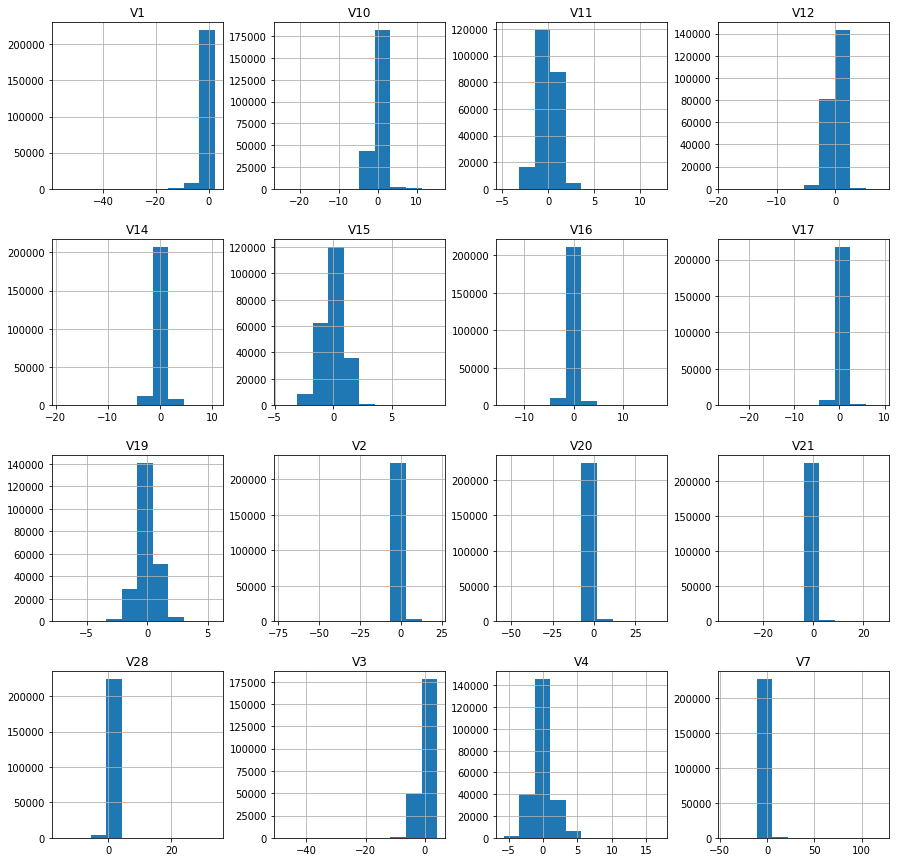

In [74]:
x_train.hist(figsize=(15, 15))
plt.show()

In [75]:
power = PowerTransformer(method='yeo-johnson', standardize=True)

In [76]:
x_train_trans = x_train.copy()
for i in x_train.columns:
    x_train_numpy = x_train[i].values
    x_train_col_trans = power.fit_transform(x_train_numpy.reshape(-1,1))
    x_train_trans[i] = (x_train_col_trans)

### Plotting distribution of variables again after power transformation, note the distribution has become more gaussian.

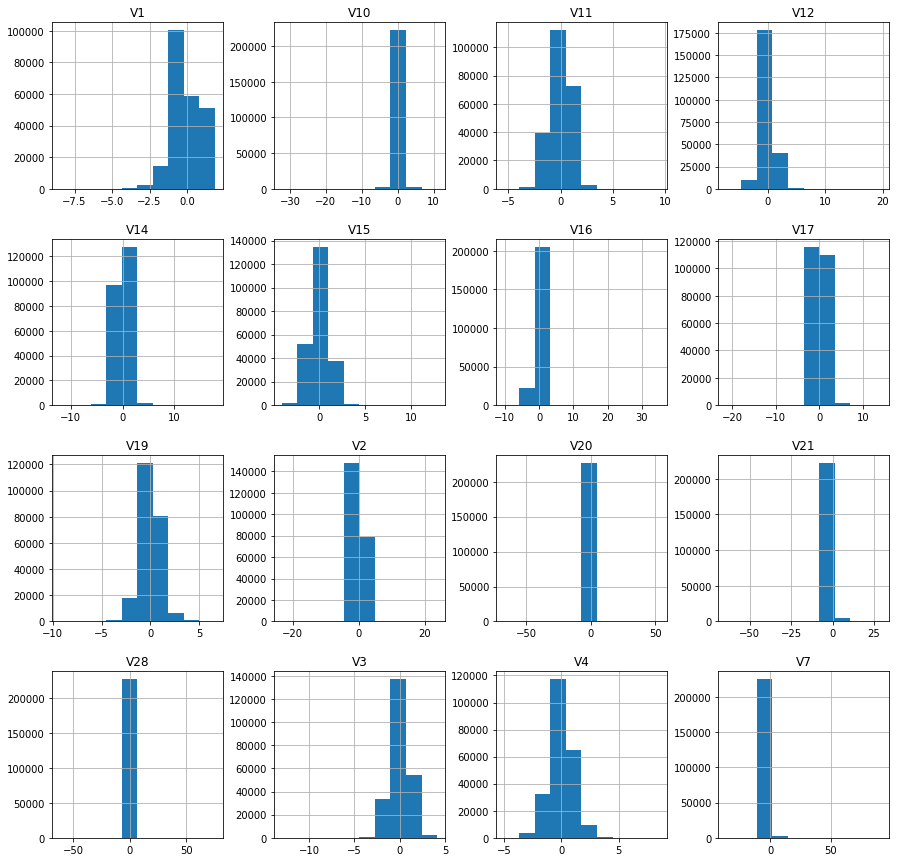

In [78]:
x_train_trans.hist(figsize=(15, 15))
plt.show()

#### Post transformation certain features like "Amount" has much better gaussian spread. We have used yeo-johnson transform and not box-cox transform because, for box-cox transformation all variable values need to be greater than zero.

#### Checking raw training data and transformed training data head.

In [79]:
x_train_trans.head()

,V1,V2,V3,V4,V7,V10,V11,V12,V14,V15,V16,V17,V19,V20,V21,V28
223361,1.344520,-0.325497,-0.366496,0.309002,-0.503688,0.016651,0.640922,2.399608,-0.346492,-0.412922,0.292103,-1.100538,0.215533,-0.165300,0.346431,-0.135393
165061,-0.479827,-0.472124,1.169181,-1.548951,0.017986,0.598148,-2.035977,-0.863722,-1.233358,0.670584,-0.262799,-1.845162,-2.110913,-0.609582,-0.197074,-0.441835
238186,-0.215881,0.487398,-0.519881,-0.458089,0.634627,-0.576153,0.545413,-0.257198,-0.727421,-0.892078,0.771892,0.013516,0.253137,0.012463,-0.426563,0.228384
150562,-0.546347,0.632860,1.361333,1.803361,0.682533,0.553735,-0.833720,-2.890811,1.477389,-1.098429,1.869977,-0.749751,-2.689707,-0.330824,0.106610,-0.190953
138452,-1.766911,1.330715,-0.439083,0.057120,-0.347967,1.121273,0.499424,2.221104,0.127612,-1.146028,0.090562,-0.030624,0.876592,-0.019270,-0.666132,-1.008476


In [80]:
x_train.head()

,V1,V2,V3,V4,V7,V10,V11,V12,V14,V15,V16,V17,V19,V20,V21,V28
223361,1.955041,-0.380783,-0.315013,0.330155,-0.627978,-0.030441,0.624996,1.691496,-0.253266,-0.331695,0.307252,-0.930844,0.167987,-0.125390,0.238197,-0.047145
165061,-0.400975,-0.626943,1.555339,-2.017772,0.017959,0.611115,-1.945070,-0.726597,-1.193347,0.631053,-0.160123,-1.630444,-1.692780,-0.470372,-0.153485,-0.144792
238186,0.072509,0.820566,-0.561351,-0.709897,0.787858,-0.638222,0.521931,-0.072768,-0.640249,-0.801946,0.678131,0.044374,0.198772,0.012227,-0.314638,0.070288
150562,-0.535045,1.014587,1.750679,2.769390,0.847902,0.560595,-0.855437,-4.179628,1.271254,-1.011647,1.458600,-0.613260,-2.147124,-0.253757,0.063525,-0.064931
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.435632,1.221746,0.472626,1.595929,0.187685,-1.060579,0.143332,0.007803,0.712695,-0.012320,-0.480691,-0.322672


#### Transforming the test dataset as well

In [81]:
x_test_trans = x_test.copy()
for i in x_test.columns:
    x_test_numpy = x_test[i].values
    x_train_numpy = x_train[i].values
    power.fit(x_train_numpy.reshape(-1,1))
    x_test_col_trans = power.transform(x_test_numpy.reshape(-1,1))
    x_test_trans[i] = (x_test_col_trans)

#### Checking base test dataset

In [82]:
x_test.head()

,V1,V2,V3,V4,V7,V10,V11,V12,V14,V16,V17,V19,V20,V21,V28
43428,-16.526507,8.584972,-18.649853,9.505594,-16.701694,-14.110184,5.299236,-10.834006,-9.373859,-9.899247,-19.236292,3.101735,-1.514923,1.190739,-1.042804
49906,0.339812,-2.743745,-0.134070,-1.385729,-0.524379,-0.565012,-0.087670,0.979427,-0.217884,-2.142892,0.126956,0.432546,0.506044,-0.213436,0.102038
29474,1.399590,-0.590701,0.168619,-1.029950,-0.712567,0.756801,0.543827,0.112453,-0.245772,1.769860,-0.533172,1.192245,0.212877,0.102398,0.004634
276481,-0.432071,1.647895,-1.669361,-0.349504,0.276990,-1.376648,-1.328335,0.223621,-0.550875,0.497974,0.502195,0.101264,-0.244633,0.358932,0.001934
278846,2.014160,-0.137394,-1.015839,0.327269,0.043241,0.259452,0.942162,0.850038,0.592634,0.091077,-0.471867,0.404711,-0.255293,-0.238644,-0.070571


##### Checking transformed test data set

In [83]:
x_test_trans.head()

,V1,V2,V3,V4,V7,V10,V11,V12,V14,V16,V17,V19,V20,V21,V28
43428,-4.184038,7.755472,-6.683996,5.239646,-13.835398,-17.310661,4.512913,-5.251687,-6.867671,-7.743197,-16.903277,3.710011,-1.946483,1.602610,-3.392683
49906,-0.041291,-1.591348,-0.247478,-1.008271,-0.419781,-0.502821,-0.039871,1.157006,-0.310232,-2.182749,0.114025,0.537671,0.652965,-0.282078,0.325851
29474,0.811466,-0.450857,-0.032927,-0.714591,-0.572256,0.725156,0.565774,-0.050510,-0.338835,2.335822,-0.659729,1.452528,0.272259,0.160316,0.025659
276481,-0.495520,1.128053,-1.127431,-0.179425,0.226018,-1.339053,-1.346492,0.082971,-0.641749,0.534964,0.583717,0.133917,-0.319067,0.510104,0.017287
278846,1.404336,-0.174791,-0.782716,0.307034,0.038321,0.284522,0.930058,0.954026,0.605282,0.027827,-0.590348,0.503881,-0.332802,-0.317953,-0.208592


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

#### Configuring and testing k-fold validation implementation, this will be used in a for loop in next block for hyper-parameter tuning.

In [86]:
recall_list = list()
r2_score_list = list()
X = x_train_trans.copy()
Y = y_train.copy()
k_fold = KFold(n_splits=5, shuffle=False) 
sklearn_logit_model = LogisticRegression(random_state=0)

for k, (train, test) in enumerate(k_fold.split(X, Y)):
    sklearn_logit_model.fit(X.iloc[train], Y.iloc[train])
    y_predict = sklearn_logit_model.predict(X.iloc[test])
    print("Fold: ",k, "R2 Score: ", round((r2_score(y_predict, Y.iloc[test])),2), "Recall for fraud transactions: ", round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2))
    recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
    r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
print("For number of folds: ", "")
print ("mean r2 score: ", round((sum(r2_score_list)/len(r2_score_list)),2))
print ("mean recall score for Fraud transactions: ", round((sum(recall_list)/len(recall_list)),2))  
    

Fold:  0 R2 Score:  0.43 Recall for fraud transactions:  0.66
Fold:  1 R2 Score:  0.31 Recall for fraud transactions:  0.6
Fold:  2 R2 Score:  0.46 Recall for fraud transactions:  0.67
Fold:  3 R2 Score:  0.12 Recall for fraud transactions:  0.54
Fold:  4 R2 Score:  0.5 Recall for fraud transactions:  0.71
For number of folds:  
mean r2 score:  0.36
mean recall score for Fraud transactions:  0.64


### Hyper-parameter tuning: Identifying the optimum value of k in k-fold cross validation

In [88]:
folds_range = (3,5,6,7,8,9,10,15,20)

for folds_num in folds_range:
    recall_list = list()
    r2_score_list = list()
    X = x_train_trans.copy()
    Y = y_train.copy()
    k_fold = KFold(n_splits=folds_num, shuffle=False)
    sklearn_logit_model = LogisticRegression(random_state=0)
    for k, (train, test) in enumerate(k_fold.split(X, Y)):
        sklearn_logit_model.fit(X.iloc[train], Y.iloc[train])
        y_predict = sklearn_logit_model.predict(X.iloc[test])
        recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
        r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
    print("Folds: ",folds_num,"mean r-sq: ", round((sum(r2_score_list)/len(r2_score_list)),2),"mean fraud transactions recall: ", round((sum(recall_list)/len(recall_list)),2))

Folds:  3 mean r-sq:  0.36 mean fraud transactions recall:  0.63
Folds:  5 mean r-sq:  0.36 mean fraud transactions recall:  0.64
Folds:  6 mean r-sq:  0.37 mean fraud transactions recall:  0.64
Folds:  7 mean r-sq:  0.37 mean fraud transactions recall:  0.64
Folds:  8 mean r-sq:  0.37 mean fraud transactions recall:  0.64
Folds:  9 mean r-sq:  0.39 mean fraud transactions recall:  0.65
Folds:  10 mean r-sq:  0.38 mean fraud transactions recall:  0.64
Folds:  15 mean r-sq:  0.34 mean fraud transactions recall:  0.63
Folds:  20 mean r-sq:  0.34 mean fraud transactions recall:  0.63


### Hyper-parameter tuning: Identifying the optimum value of c_param/c_num for "l1" loss

In [92]:
c_param_range = (0.005,0.01,0.1,0.5,0.75,1,5,10,50,100)

for c_param in c_param_range:
    recall_list = list()
    r2_score_list = list()
    X = x_train_trans.copy()
    Y = y_train.copy()
    k_fold = KFold(n_splits=9, shuffle=False)
    sklearn_logit_model = LogisticRegression(C = c_param, penalty = 'l1',random_state=0,solver='liblinear')
    for k, (train, test) in enumerate(k_fold.split(X, Y)):
        sklearn_logit_model.fit(X.iloc[train], Y.iloc[train])
        y_predict = sklearn_logit_model.predict(X.iloc[test])
        recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
        r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
    print("C_Num: ",c_param,"mean r-sq: ", round((sum(r2_score_list)/len(r2_score_list)),2),"mean fraud transactions recall: ", round((sum(recall_list)/len(recall_list)),2))

C_Num:  0.005 mean r-sq:  0.03 mean fraud transactions recall:  0.52
C_Num:  0.01 mean r-sq:  0.21 mean fraud transactions recall:  0.58
C_Num:  0.1 mean r-sq:  0.32 mean fraud transactions recall:  0.62
C_Num:  0.5 mean r-sq:  0.36 mean fraud transactions recall:  0.64
C_Num:  0.75 mean r-sq:  0.37 mean fraud transactions recall:  0.64
C_Num:  1 mean r-sq:  0.38 mean fraud transactions recall:  0.64
C_Num:  5 mean r-sq:  0.39 mean fraud transactions recall:  0.65
C_Num:  10 mean r-sq:  0.39 mean fraud transactions recall:  0.65
C_Num:  50 mean r-sq:  0.39 mean fraud transactions recall:  0.65
C_Num:  100 mean r-sq:  0.39 mean fraud transactions recall:  0.65


### Hyper-parameter tuning: Identifying the optimum value of c_param/c_num for "l2" loss

In [94]:
c_param_range = (0.005,0.01,0.1,0.5,0.75,1,5,10,50,100)

for c_param in c_param_range:
    recall_list = list()
    r2_score_list = list()
    X = x_train_trans.copy()
    Y = y_train.copy()
    k_fold = KFold(n_splits=9, shuffle=False)
    sklearn_logit_model = LogisticRegression(C = c_param, penalty = 'l2',random_state=0)
    for k, (train, test) in enumerate(k_fold.split(X, Y)):
        sklearn_logit_model.fit(X.iloc[train], Y.iloc[train])
        y_predict = sklearn_logit_model.predict(X.iloc[test])
        recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
        r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
    print("C_Num: ",c_param,"mean r-sq: ", round((sum(r2_score_list)/len(r2_score_list)),2),"mean fraud transactions recall: ", round((sum(recall_list)/len(recall_list)),2))

C_Num:  0.005 mean r-sq:  0.23 mean fraud transactions recall:  0.58
C_Num:  0.01 mean r-sq:  0.26 mean fraud transactions recall:  0.59
C_Num:  0.1 mean r-sq:  0.35 mean fraud transactions recall:  0.63
C_Num:  0.5 mean r-sq:  0.38 mean fraud transactions recall:  0.64
C_Num:  0.75 mean r-sq:  0.39 mean fraud transactions recall:  0.65
C_Num:  1 mean r-sq:  0.39 mean fraud transactions recall:  0.65
C_Num:  5 mean r-sq:  0.39 mean fraud transactions recall:  0.65
C_Num:  10 mean r-sq:  0.39 mean fraud transactions recall:  0.65
C_Num:  50 mean r-sq:  0.39 mean fraud transactions recall:  0.65
C_Num:  100 mean r-sq:  0.39 mean fraud transactions recall:  0.65


### We are using 2 metrics for model evaluation: 
#### "r2 score" : helps us estimate the overall model fit
#### "Recall for fraud transaction": Helps us determine our model's capability to detect fraud transactions.

#### Note 1: Cost of a fraud is much higher to business, therefore we are biasing our model selection towards picking maximum number of fraud transactions, this will result in precision trade-off, which means some non-fraud transactions might be labeled as fraud as well. However, such transactions can always be unblocked through manual verification and thus doesn't pose a large problem.

#### Note 2: Regularization in model handles any variables which might have been left unhandled by RFECV.

#### ********************************************************************************************************************

## Optimum Model Hyperparameter values:
### k = 9
### c (inversely proportional to regularization strength) = 5 for L1 & 0.75 for L2.
### penalty = l1 / l2 either is fine, peak performance is same for both.

#### ********************************************************************************************************************

### **All the classifiers are being tested on 2 folds initially, we will use optimum number of folds (9) only for best model. This will save a significant model training time.**

### Testing SVM classifier

In [97]:
from sklearn.svm import SVC

recall_list = list()
r2_score_list = list()
X = x_train_trans.copy()
Y = y_train.copy()
k_fold = KFold(n_splits=2, shuffle=False) 
svc_classifier = SVC(random_state=0,C = 5)

for k, (train, test) in enumerate(k_fold.split(X, Y)):
    svc_classifier.fit(X.iloc[train], Y.iloc[train])
    y_predict = svc_classifier.predict(X.iloc[test])
    print("Fold: ",k, "R2 Score: ", round((r2_score(y_predict, Y.iloc[test])),2), "Recall for fraud transactions: ", round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2))
    recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
    r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
print("For number of folds: 2")
print ("mean r2 score: ", round((sum(r2_score_list)/len(r2_score_list)),2))
print ("mean recall score for Fraud transactions: ", round((sum(recall_list)/len(recall_list)),2))  

Fold:  0 R2 Score:  0.4 Recall for fraud transactions:  0.63
Fold:  1 R2 Score:  0.46 Recall for fraud transactions:  0.67
For number of folds: 2
mean r2 score:  0.43
mean recall score for Fraud transactions:  0.65


### Testing KNN classifier

In [99]:
from sklearn.neighbors import KNeighborsClassifier

recall_list = list()
r2_score_list = list()
X = x_train_trans.copy()
Y = y_train.copy()
k_fold = KFold(n_splits=2, shuffle=False) 
knn_clf=KNeighborsClassifier(n_neighbors=3,metric="minkowski",p=1)

for k, (train, test) in enumerate(k_fold.split(X, Y)):
    knn_clf.fit(X.iloc[train], Y.iloc[train])
    y_predict = knn_clf.predict(X.iloc[test])
    print("Fold: ",k, "R2 Score: ", round((r2_score(y_predict, Y.iloc[test])),2), "Recall for fraud transactions: ", round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2))
    recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
    r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
print("For number of folds: 2")
print ("mean r2 score: ", round((sum(r2_score_list)/len(r2_score_list)),2))
print ("mean recall score for Fraud transactions: ", round((sum(recall_list)/len(recall_list)),2))  

Fold:  0 R2 Score:  0.6 Recall for fraud transactions:  0.76
Fold:  1 R2 Score:  0.66 Recall for fraud transactions:  0.77
For number of folds: 2
mean r2 score:  0.63
mean recall score for Fraud transactions:  0.76


### Testing Decision Tree classifier

In [101]:
from sklearn.tree import DecisionTreeClassifier

recall_list = list()
r2_score_list = list()
X = x_train_trans.copy()
Y = y_train.copy()
k_fold = KFold(n_splits=2, shuffle=False) 
dt_clf=DecisionTreeClassifier(criterion="entropy",random_state=5)

for k, (train, test) in enumerate(k_fold.split(X, Y)):
    dt_clf.fit(X.iloc[train], Y.iloc[train])
    y_predict = dt_clf.predict(X.iloc[test])
    print("Fold: ",k, "R2 Score: ", round((r2_score(y_predict, Y.iloc[test])),2), "Recall for fraud transactions: ", round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2))
    recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
    r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
print("For number of folds: 2")
print ("mean r2 score: ", round((sum(r2_score_list)/len(r2_score_list)),2))
print ("mean recall score for Fraud transactions: ", round((sum(recall_list)/len(recall_list)),2))  

Fold:  0 R2 Score:  0.48 Recall for fraud transactions:  0.75
Fold:  1 R2 Score:  0.5 Recall for fraud transactions:  0.74
For number of folds: 2
mean r2 score:  0.49
mean recall score for Fraud transactions:  0.74


### Testing Random Forest classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier

recall_list = list()
r2_score_list = list()
X = x_train_trans.copy()
Y = y_train.copy()
k_fold = KFold(n_splits=2, shuffle=False) 
rf_clf=RandomForestClassifier(n_estimators=20,criterion="entropy",random_state=5)

for k, (train, test) in enumerate(k_fold.split(X, Y)):
    rf_clf.fit(X.iloc[train], Y.iloc[train])
    y_predict = rf_clf.predict(X.iloc[test])
    print("Fold: ",k, "R2 Score: ", round((r2_score(y_predict, Y.iloc[test])),2), "Recall for fraud transactions: ", round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2))
    recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
    r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
print("For number of folds: 2")
print ("mean r2 score: ", round((sum(r2_score_list)/len(r2_score_list)),2))
print ("mean recall score for Fraud transactions: ", round((sum(recall_list)/len(recall_list)),2))  

Fold:  0 R2 Score:  0.63 Recall for fraud transactions:  0.76
Fold:  1 R2 Score:  0.63 Recall for fraud transactions:  0.76
For number of folds: 2
mean r2 score:  0.63
mean recall score for Fraud transactions:  0.76


### Testing XGBoost classifier

In [148]:
pip install xgboost

    100% |████████████████████████████████| 157.5MB 246kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [104]:
from xgboost import XGBClassifier

recall_list = list()
r2_score_list = list()
X = x_train_trans.copy()
Y = y_train.copy()
k_fold = KFold(n_splits=2, shuffle=False) 
xgb_clf=XGBClassifier()

for k, (train, test) in enumerate(k_fold.split(X, Y)):
    xgb_clf.fit(X.iloc[train], Y.iloc[train])
    y_predict = xgb_clf.predict(X.iloc[test])
    print("Fold: ",k, "R2 Score: ", round((r2_score(y_predict, Y.iloc[test])),2), "Recall for fraud transactions: ", round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2))
    recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
    r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
print("For number of folds: 2")
print ("mean r2 score: ", round((sum(r2_score_list)/len(r2_score_list)),2))
print ("mean recall score for Fraud transactions: ", round((sum(recall_list)/len(recall_list)),2))  

[17:44:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold:  0 R2 Score:  0.62 Recall for fraud transactions:  0.76
[17:44:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold:  1 R2 Score:  0.65 Recall for fraud transactions:  0.77
For number of folds: 2
mean r2 score:  0.64
mean recall score for Fraud transactions:  0.76


### Balancing the classes by Random oversampling

In [155]:
pip install imblearn

    100% |████████████████████████████████| 215kB 7.8MB/s ta 0:00:01
    100% |████████████████████████████████| 307kB 11.6MB/s ta 0:00:01
    100% |████████████████████████████████| 22.3MB 2.3MB/s eta 0:00:01
autokeras 0.4.0 requires tensorflow==1.13.1, which is not installed.
autokeras 0.4.0 has requirement scikit-learn==0.20.2, but you'll have scikit-learn 0.24.1 which is incompatible.
autokeras 0.4.0 has requirement torch==1.0.1.post2, but you'll have torch 1.2.0 which is incompatible.
  Found existing installation: scikit-learn 0.20.2
    Uninstalling scikit-learn-0.20.2:
      Successfully uninstalled scikit-learn-0.20.2
Note: you may need to restart the kernel to use updated packages.


In [109]:
from imblearn.over_sampling import RandomOverSampler

In [111]:
ros = RandomOverSampler(random_state=0)
ros.fit(x_train_trans, y_train)
X_resampled, y_resampled = ros.fit_resample(x_train_trans, y_train)

In [112]:
print(y_resampled.value_counts())

1    227451
0    227451
Name: Class, dtype: int64


In [113]:
from collections import Counter # counter takes values returns value_counts dictionary

print('Original dataset shape %s' % Counter(y_train))


print('Resampled dataset shape %s' % Counter(y_resampled))

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({0: 227451, 1: 227451})


### Building Logistic Regression classification model post balancing dataset with random oversampling

In [120]:
recall_list = list()
r2_score_list = list()
X = X_resampled.copy()
Y = y_resampled.copy()
k_fold = KFold(n_splits=9, shuffle=False)
sklearn_logit_model = LogisticRegression(C = 5, penalty = 'l1',random_state=0,solver='liblinear')
for k, (train, test) in enumerate(k_fold.split(X, Y)):
    sklearn_logit_model.fit(X.iloc[train], Y.iloc[train])
    y_predict = sklearn_logit_model.predict(X.iloc[test])
    print("Fold: ",k,"Recall for fraud transactions: ", round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2))
    recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
    r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
print("mean r-sq: ","mean fraud transactions recall: ", round((sum(recall_list)/len(recall_list)),2))

Fold:  0 Recall for fraud transactions:  0.92
Fold:  1 Recall for fraud transactions:  0.87
Fold:  2 Recall for fraud transactions:  0.9
Fold:  3 Recall for fraud transactions:  0.93
Fold:  4 Recall for fraud transactions:  0.9
Fold:  5 Recall for fraud transactions:  0.9
Fold:  6 Recall for fraud transactions:  0.9
Fold:  7 Recall for fraud transactions:  0.9
Fold:  8 Recall for fraud transactions:  0.9
mean r-sq:  mean fraud transactions recall:  0.9


### Building SVM classification model post balancing dataset with random oversampling

In [121]:
from sklearn.svm import SVC

recall_list = list()
r2_score_list = list()
X = X_resampled.copy()
Y = y_resampled.copy()
k_fold = KFold(n_splits=2, shuffle=False) 
svc_classifier = SVC(random_state=0,C = 5)

for k, (train, test) in enumerate(k_fold.split(X, Y)):
    svc_classifier.fit(X.iloc[train], Y.iloc[train])
    y_predict = svc_classifier.predict(X.iloc[test])
    print("Fold: ",k,"Recall for fraud transactions: ", round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2))
    recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
    r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
print ("mean recall score for Fraud transactions: ", round((sum(recall_list)/len(recall_list)),2))  

Fold:  0 R2 Score:  -1.28 Recall for fraud transactions:  1.0


KeyboardInterrupt: 

### Building KNN classification model post balancing dataset with random oversampling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

recall_list = list()
r2_score_list = list()
X = X_resampled.copy()
Y = y_resampled.copy()
k_fold = KFold(n_splits=1, shuffle=False, random_state=42) 
knn_clf=KNeighborsClassifier(n_neighbors=3,metric="minkowski",p=1)

for k, (train, test) in enumerate(k_fold.split(X, Y)):
    knn_clf.fit(X.iloc[train], Y.iloc[train])
    y_predict = knn_clf.predict(X.iloc[test])
    print("Fold: ",k, "R2 Score: ", round((r2_score(y_predict, Y.iloc[test])),2), "Recall for fraud transactions: ", round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2))
    recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
    r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
print("For number of folds: ", "")
print ("mean r2 score: ", round((sum(r2_score_list)/len(r2_score_list)),2))
print ("mean recall score for Fraud transactions: ", round((sum(recall_list)/len(recall_list)),2))  

### Building Decision Tree classification model post balancing dataset with random oversampling

In [128]:
from sklearn.tree import DecisionTreeClassifier

recall_list = list()
r2_score_list = list()
X = X_resampled.copy()
Y = y_resampled.copy()
k_fold = KFold(n_splits=3, shuffle=False) 
dt_clf=DecisionTreeClassifier(criterion="entropy",random_state=5)

for k, (train, test) in enumerate(k_fold.split(X, Y)):
    dt_clf.fit(X.iloc[train], Y.iloc[train])
    y_predict = dt_clf.predict(X.iloc[test])
    print("Fold: ",k, "R2 Score: ", round((r2_score(y_predict, Y.iloc[test])),2), "Recall for normal & fraud transactions: ",(recall_score(Y.iloc[test], y_predict, average=None)))
#     recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
#     r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
# print("For number of folds: 3")
# print ("mean r2 score: ", round((sum(r2_score_list)/len(r2_score_list)),2))
# print ("mean recall score for Fraud transactions: ", round((sum(recall_list)/len(recall_list)),2))  

Fold:  0 R2 Score:  0.6 Recall for normal & fraud transactions:  [0.99887701 1.        ]
Fold:  1 R2 Score:  1.0 Recall for normal & fraud transactions:  [0.99935585 1.        ]
Fold:  2 R2 Score:  1.0 Recall for normal & fraud transactions:  [1.]


### Building Random Forest classification model post balancing dataset with random oversampling

In [132]:
from sklearn.ensemble import RandomForestClassifier

recall_list = list()
r2_score_list = list()
X = X_resampled.copy()
Y = y_resampled.copy()
k_fold = KFold(n_splits=2, shuffle=False) 
rf_clf=RandomForestClassifier(n_estimators=20,criterion="entropy",random_state=5)

for k, (train, test) in enumerate(k_fold.split(X, Y)):
    rf_clf.fit(X.iloc[train], Y.iloc[train])
    y_predict = rf_clf.predict(X.iloc[test])
    print("Fold: ",k, "R2 Score: ", round((r2_score(y_predict, Y.iloc[test])),2), "Recall for fraud transactions: ", round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2))
    recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
    r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
print("For number of folds: ", "")
print ("mean r2 score: ", round((sum(r2_score_list)/len(r2_score_list)),2))
print ("mean recall score for Fraud transactions: ", round((sum(recall_list)/len(recall_list)),2))  

Fold:  0 R2 Score:  -0.01 Recall for fraud transactions:  1.0
Fold:  1 R2 Score:  0.04 Recall for fraud transactions:  0.98
For number of folds:  
mean r2 score:  0.02
mean recall score for Fraud transactions:  0.99


### Building XGBoost classification model post balancing dataset with random oversampling

In [134]:
from xgboost import XGBClassifier

recall_list = list()
r2_score_list = list()
X = X_resampled.copy()
Y = y_resampled.copy()
k_fold = KFold(n_splits=2, shuffle=False) 
xgb_clf=XGBClassifier()

for k, (train, test) in enumerate(k_fold.split(X, Y)):
    xgb_clf.fit(X.iloc[train], Y.iloc[train])
    y_predict = xgb_clf.predict(X.iloc[test])
    print("Fold: ",k, "R2 Score: ", round((r2_score(y_predict, Y.iloc[test])),2), "Recall for fraud transactions: ", round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2))
    recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
    r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
print("For number of folds: ", "")
print ("mean r2 score: ", round((sum(r2_score_list)/len(r2_score_list)),2))
print ("mean recall score for Fraud transactions: ", round((sum(recall_list)/len(recall_list)),2))  

[18:05:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold:  0 R2 Score:  -0.1 Recall for fraud transactions:  1.0
[18:05:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold:  1 R2 Score:  1.0 Recall for fraud transactions:  1.0
For number of folds:  
mean r2 score:  0.45
mean recall score for Fraud transactions:  1.0


### Balancing the classes by Smote

In [135]:
from imblearn.over_sampling import SMOTE, ADASYN

In [136]:
from collections import Counter # counter takes values returns value_counts dictionary

print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(x_train_trans, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({0: 227451, 1: 227451})


### Building Logistic Regression classification model post balancing dataset with random oversampling

In [139]:
recall_list = list()
r2_score_list = list()
X = X_train_smote.copy()
Y = y_train_smote.copy()
k_fold = KFold(n_splits=2, shuffle=False)
sklearn_logit_model = LogisticRegression(C = 5, penalty = 'l1',random_state=0,solver='liblinear')
for k, (train, test) in enumerate(k_fold.split(X, Y)):
    sklearn_logit_model.fit(X.iloc[train], Y.iloc[train])
    y_predict = sklearn_logit_model.predict(X.iloc[test])
    recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
    r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
print("mean fraud transactions recall: ", round((sum(recall_list)/len(recall_list)),2))

mean fraud transactions recall:  0.82


### Building SVM classification model post balancing dataset with random oversampling

In [ ]:
from sklearn.svm import SVC

recall_list = list()
r2_score_list = list()
X = X_train_smote.copy()
Y = y_train_smote.copy()
k_fold = KFold(n_splits=2, shuffle=False) 
svc_classifier = SVC(random_state=0,C = 1)

for k, (train, test) in enumerate(k_fold.split(X, Y)):
    svc_classifier.fit(X.iloc[train], Y.iloc[train])
    y_predict = svc_classifier.predict(X.iloc[test])
    print("Fold: ",k, "R2 Score: ", round((r2_score(y_predict, Y.iloc[test])),2), "Recall for fraud transactions: ", round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2))
    recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
    r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
print("For number of folds: ",6)
print ("mean r2 score: ", round((sum(r2_score_list)/len(r2_score_list)),2))
print ("mean recall score for Fraud transactions: ", round((sum(recall_list)/len(recall_list)),2))  

### Building KNN classification model post balancing dataset with random oversampling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

recall_list = list()
r2_score_list = list()
X = X_train_smote.copy()
Y = y_train_smote.copy()
k_fold = KFold(n_splits=1, shuffle=False, random_state=42) 
knn_clf=KNeighborsClassifier(n_neighbors=3,metric="minkowski",p=1)

for k, (train, test) in enumerate(k_fold.split(X, Y)):
    knn_clf.fit(X.iloc[train], Y.iloc[train])
    y_predict = knn_clf.predict(X.iloc[test])
    print("Fold: ",k, "R2 Score: ", round((r2_score(y_predict, Y.iloc[test])),2), "Recall for fraud transactions: ", round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2))
    recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
    r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
print("For number of folds: ", "")
print ("mean r2 score: ", round((sum(r2_score_list)/len(r2_score_list)),2))
print ("mean recall score for Fraud transactions: ", round((sum(recall_list)/len(recall_list)),2))  

### Building Decision tree Regression classification model post balancing dataset with random oversampling

In [141]:
from sklearn.tree import DecisionTreeClassifier

recall_list = list()
r2_score_list = list()
X = X_train_smote.copy()
Y = y_train_smote.copy()
k_fold = KFold(n_splits=2, shuffle=False) 
dt_clf=DecisionTreeClassifier(criterion="entropy",random_state=5)

for k, (train, test) in enumerate(k_fold.split(X, Y)):
    dt_clf.fit(X.iloc[train], Y.iloc[train])
    y_predict = dt_clf.predict(X.iloc[test])
    print("Fold: ",k, "R2 Score: ", round((r2_score(y_predict, Y.iloc[test])),2), "Recall for fraud transactions: ", round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2))
    recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
    r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
print("For number of folds: ", "")
print ("mean r2 score: ", round((sum(r2_score_list)/len(r2_score_list)),2))
print ("mean recall score for Fraud transactions: ", round((sum(recall_list)/len(recall_list)),2))  

Fold:  0 R2 Score:  -0.24 Recall for fraud transactions:  1.0
Fold:  1 R2 Score:  -0.16 Recall for fraud transactions:  0.85
For number of folds:  
mean r2 score:  -0.2
mean recall score for Fraud transactions:  0.92


### Building Random Forest classification model post balancing dataset with random oversampling

In [143]:
from sklearn.ensemble import RandomForestClassifier

recall_list = list()
r2_score_list = list()
X = X_train_smote.copy()
Y = y_train_smote.copy()
k_fold = KFold(n_splits=2, shuffle=False) 
rf_clf=RandomForestClassifier(n_estimators=20,criterion="entropy",random_state=5)

for k, (train, test) in enumerate(k_fold.split(X, Y)):
    rf_clf.fit(X.iloc[train], Y.iloc[train])
    y_predict = rf_clf.predict(X.iloc[test])
    print("Fold: ",k, "R2 Score: ", round((r2_score(y_predict, Y.iloc[test])),2), "Recall for fraud transactions: ", round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2))
    recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
    r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
print("For number of folds: ", "")
print ("mean r2 score: ", round((sum(r2_score_list)/len(r2_score_list)),2))
print ("mean recall score for Fraud transactions: ", round((sum(recall_list)/len(recall_list)),2))  

Fold:  0 R2 Score:  -0.21 Recall for fraud transactions:  1.0
Fold:  1 R2 Score:  -0.2 Recall for fraud transactions:  0.83
For number of folds:  
mean r2 score:  -0.2
mean recall score for Fraud transactions:  0.92


### Building XG Boost classification model post balancing dataset with random oversampling

In [144]:
from xgboost import XGBClassifier

recall_list = list()
r2_score_list = list()
X = X_train_smote.copy()
Y = y_train_smote.copy()
k_fold = KFold(n_splits=2, shuffle=False) 
xgb_clf=XGBClassifier()

for k, (train, test) in enumerate(k_fold.split(X, Y)):
    xgb_clf.fit(X.iloc[train], Y.iloc[train])
    y_predict = xgb_clf.predict(X.iloc[test])
    print("Fold: ",k, "R2 Score: ", round((r2_score(y_predict, Y.iloc[test])),2), "Recall for fraud transactions: ", round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2))
    recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
    r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
print("For number of folds: ", "")
print ("mean r2 score: ", round((sum(r2_score_list)/len(r2_score_list)),2))
print ("mean recall score for Fraud transactions: ", round((sum(recall_list)/len(recall_list)),2))  

[18:09:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold:  0 R2 Score:  -0.27 Recall for fraud transactions:  1.0
[18:09:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold:  1 R2 Score:  -0.17 Recall for fraud transactions:  0.85
For number of folds:  
mean r2 score:  -0.22
mean recall score for Fraud transactions:  0.92


### Balancing classes using ADASYN

In [146]:
print('Original dataset shape %s' % Counter(y_train))

adasyn = ADASYN(random_state=42)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(x_train_trans, y_train)
print('Resampled dataset shape %s' % Counter(y_train_adasyn))

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({0: 227451, 1: 227404})


In [ ]:
### Building Logistic Regression classification model post balancing dataset with ADASYN

In [150]:
recall_list = list()
r2_score_list = list()
X = X_train_adasyn.copy()
Y = y_train_adasyn.copy()
k_fold = KFold(n_splits=2, shuffle=False)
sklearn_logit_model = LogisticRegression(C = 5, penalty = 'l1',random_state=0,solver='liblinear')
for k, (train, test) in enumerate(k_fold.split(X, Y)):
    sklearn_logit_model.fit(X.iloc[train], Y.iloc[train])
    y_predict = sklearn_logit_model.predict(X.iloc[test])
    recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
    r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
print("mean fraud transactions recall: ", round((sum(recall_list)/len(recall_list)),2))

mean fraud transactions recall:  0.57


In [ ]:
### Building SVM classification model post balancing dataset with ADASYN

In [ ]:
from sklearn.svm import SVC

recall_list = list()
r2_score_list = list()
X = X_train_adasyn.copy()
Y = y_train_adasyn.copy()
k_fold = KFold(n_splits=1, shuffle=False, random_state=42) 
svc_classifier = SVC(random_state=0,C = 1)

for k, (train, test) in enumerate(k_fold.split(X, Y)):
    svc_classifier.fit(X.iloc[train], Y.iloc[train])
    y_predict = svc_classifier.predict(X.iloc[test])
    print("Fold: ",k, "R2 Score: ", round((r2_score(y_predict, Y.iloc[test])),2), "Recall for fraud transactions: ", round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2))
    recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
    r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
print("For number of folds: ",6)
print ("mean r2 score: ", round((sum(r2_score_list)/len(r2_score_list)),2))
print ("mean recall score for Fraud transactions: ", round((sum(recall_list)/len(recall_list)),2))  

In [ ]:
### Building KNN classification model post balancing dataset with ADASYN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

recall_list = list()
r2_score_list = list()
X = X_train_adasyn.copy()
Y = y_train_adasyn.copy()
k_fold = KFold(n_splits=1, shuffle=False, random_state=42) 
knn_clf=KNeighborsClassifier(n_neighbors=3,metric="minkowski",p=1)

for k, (train, test) in enumerate(k_fold.split(X, Y)):
    knn_clf.fit(X.iloc[train], Y.iloc[train])
    y_predict = knn_clf.predict(X.iloc[test])
    print("Fold: ",k, "R2 Score: ", round((r2_score(y_predict, Y.iloc[test])),2), "Recall for fraud transactions: ", round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2))
    recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
    r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
print("For number of folds: ", "")
print ("mean r2 score: ", round((sum(r2_score_list)/len(r2_score_list)),2))
print ("mean recall score for Fraud transactions: ", round((sum(recall_list)/len(recall_list)),2))  

In [ ]:
### Building Decision Tree classification model post balancing dataset with ADASYN

In [151]:
from sklearn.tree import DecisionTreeClassifier

recall_list = list()
r2_score_list = list()
X = X_train_adasyn.copy()
Y = y_train_adasyn.copy()
k_fold = KFold(n_splits=2, shuffle=False) 
dt_clf=DecisionTreeClassifier(criterion="entropy",random_state=5)

for k, (train, test) in enumerate(k_fold.split(X, Y)):
    dt_clf.fit(X.iloc[train], Y.iloc[train])
    y_predict = dt_clf.predict(X.iloc[test])
    print("Fold: ",k, "R2 Score: ", round((r2_score(y_predict, Y.iloc[test])),2), "Recall for fraud transactions: ", round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2))
    recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
    r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
print("For number of folds: ", "")
print ("mean r2 score: ", round((sum(r2_score_list)/len(r2_score_list)),2))
print ("mean recall score for Fraud transactions: ", round((sum(recall_list)/len(recall_list)),2))  

Fold:  0 R2 Score:  -0.25 Recall for fraud transactions:  0.99
Fold:  1 R2 Score:  -1.33 Recall for fraud transactions:  0.43
For number of folds:  
mean r2 score:  -0.79
mean recall score for Fraud transactions:  0.71


In [ ]:
### Building Random Forest classification model post balancing dataset with ADASYN

In [153]:
from sklearn.ensemble import RandomForestClassifier

recall_list = list()
r2_score_list = list()
X = X_train_adasyn.copy()
Y = y_train_adasyn.copy()
k_fold = KFold(n_splits=2, shuffle=False) 
rf_clf=RandomForestClassifier(n_estimators=20,criterion="entropy",random_state=5)

for k, (train, test) in enumerate(k_fold.split(X, Y)):
    rf_clf.fit(X.iloc[train], Y.iloc[train])
    y_predict = rf_clf.predict(X.iloc[test])
    print("Fold: ",k, "Recall for fraud transactions: ", round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2))
    recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
    r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
print("For number of folds: 2")
print ("mean recall score for Fraud transactions: ", round((sum(recall_list)/len(recall_list)),2))  

Fold:  0 Recall for fraud transactions:  1.0
Fold:  1 Recall for fraud transactions:  0.32
For number of folds: 2
mean recall score for Fraud transactions:  0.66


In [ ]:
### Building XG Boost classification model post balancing dataset with ADASYN

In [156]:
from xgboost import XGBClassifier

recall_list = list()
r2_score_list = list()
X = X_train_adasyn.copy()
Y = y_train_adasyn.copy()
k_fold = KFold(n_splits=2, shuffle=False) 
xgb_clf=XGBClassifier()

for k, (train, test) in enumerate(k_fold.split(X, Y)):
    xgb_clf.fit(X.iloc[train], Y.iloc[train])
    y_predict = xgb_clf.predict(X.iloc[test])
    print("Fold: ",k, "R2 Score: ", round((r2_score(y_predict, Y.iloc[test])),2), "Recall for fraud transactions: ", round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2))
    recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
    r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))
print("For number of folds: ", "")
print ("mean r2 score: ", round((sum(r2_score_list)/len(r2_score_list)),2))
print ("mean recall score for Fraud transactions: ", round((sum(recall_list)/len(recall_list)),2))  

[18:15:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold:  0 R2 Score:  -0.28 Recall for fraud transactions:  1.0
[18:15:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold:  1 R2 Score:  -1.61 Recall for fraud transactions:  0.38
For number of folds:  
mean r2 score:  -0.94
mean recall score for Fraud transactions:  0.69


Top var = 12
2nd Top var = 9
3rd Top var = 6


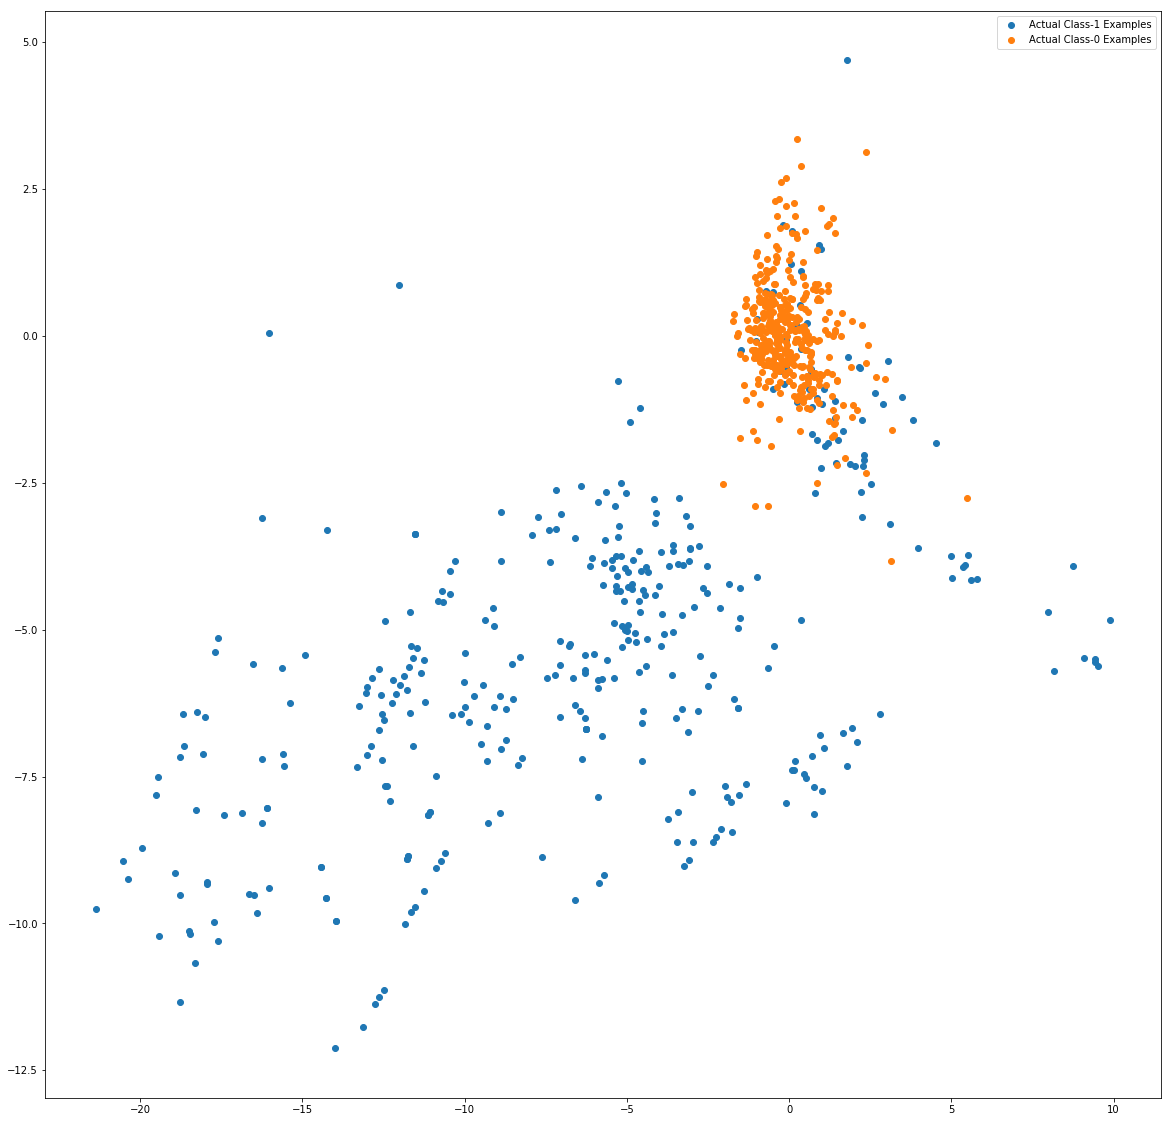

In [158]:
var_imp = []
clf = dt_clf
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = x_train_trans.to_numpy()[np.where(y_train==1.0)]
X_train_0 = x_train_trans.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [166]:
from sklearn.tree import DecisionTreeClassifier

recall_list = list()
r2_score_list = list()
X = X_train_adasyn.copy()
Y = y_train_adasyn.copy()
k_fold = KFold(n_splits=2, shuffle=False) 
dt_clf=DecisionTreeClassifier(criterion="entropy",random_state=5)

for k, (train, test) in enumerate(k_fold.split(X, Y)):
    dt_clf.fit(X.iloc[train], Y.iloc[train])
    y_predict = dt_clf.predict(X.iloc[test])
    print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_predict , Y.iloc[test]))) 
    print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(Y.iloc[test] , y_predict)))
    print('Precision : {0:0.5f}'.format(metrics.precision_score(Y.iloc[test] , y_predict)))
    print('Recall : {0:0.5f}'.format(metrics.recall_score(Y.iloc[test] , y_predict)))
    print('F1 : {0:0.5f}'.format(metrics.f1_score(Y.iloc[test] , y_predict)))
    recall_list.append(round((recall_score(Y.iloc[test], y_predict, average=None)[1]),2)) 
    r2_score_list.append(round((r2_score(y_predict, Y.iloc[test])),2))


Accuracy :0.79673
AUC : 0.89438
Precision : 0.00837
Recall : 0.99237
F1 : 0.01659
Accuracy :0.43056
AUC : 0.71476
Precision : 1.00000
Recall : 0.42951
F1 : 0.60092


### Selecting Decision tree model with Adasyn/Smote balancng As it gives best accuracy and recall